In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
import threading

def printit():
  threading.Timer(5.0, printit).start()
  print("Hello, World!")

printit()


Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!


In [ ]:
import datetime

today = datetime.datetime.today()

In [29]:
today = datetime.datetime.today()
clock_1 = today+ datetime.timedelta(microseconds =10000000)
clock_2 = today + datetime.timedelta(microseconds =1000000)


In [35]:
clock_1 - clock_2 > datetime.timedelta(seconds=0)

False

In [6]:
import datetime

timer_delay_ms = 100000

today = datetime.datetime.today()  + datetime.timedelta(seconds=5)
timer = today + datetime.timedelta(microseconds = timer_delay_ms)

for i in range(20):
    while (timer - datetime.datetime.today()) >= datetime.timedelta(seconds=0):
        pass
    timer = datetime.datetime.today() + datetime.timedelta(microseconds =1000000)
    print('test', timer)



test 2020-11-04 23:12:36.205469
test 2020-11-04 23:12:37.205473
test 2020-11-04 23:12:38.205476
test 2020-11-04 23:12:39.205480
test 2020-11-04 23:12:40.205484


KeyboardInterrupt: 

In [7]:
timer_offset = 5/53.45

In [9]:
print(datetime.datetime.today())
print(datetime.datetime.today() + datetime.timedelta(microseconds= 1000000*timer_offset))

2020-11-04 23:39:48.287158
2020-11-04 23:39:48.380922


In [15]:
1/53*5

0.09433962264150943

In [13]:
print(datetime.timedelta(microseconds= 1000000*timer_offset))

0:00:00.093545


In [2]:
df = pd.read_csv('df.csv')

In [3]:
df[:200]

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
195,-1015.808
196,-802.816
197,-622.592
198,-671.744


In [6]:
window = 180

class show_window_data():

    def __init__(self, df_ecg):
        self.df_data = df_ecg
        self.starting_frame = 0
        self.ending_frame = window
        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = self.df_data['ECG'].\
            loc[self.starting_frame:self.ending_frame].values

        # Padding
        temp_list = np.zeros(window + 1)
        temp_list[:len(self.y_axis)] = self.y_axis
        self.y_axis = temp_list

    def new_data_available(self, df):
        self.df_data = df
        if (self.df_data.index[-1:][0] - self.starting_frame) >= 180:
            self.df_data = df
            self.starting_frame += window
            self.ending_frame += window

        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = self.df_data['ECG'].\
            loc[self.starting_frame:self.ending_frame].values
        if len(self.y_axis) == window + 1:
            pass
        else:
            temp_list = np.zeros(window + 1)
            temp_list[:len(self.y_axis)] = self.y_axis
            self.y_axis = temp_list

        return self.df_data, self.x_axis, self.y_axis

In [9]:
show_window_data_a = show_window_data(df)

TypeError: __init__() missing 1 required positional argument: 'df_ecg'

In [8]:
show_window_data_a.df_data

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
3203,-884.736
3204,-933.888
3205,-901.120
3206,-917.504


<AxesSubplot:>

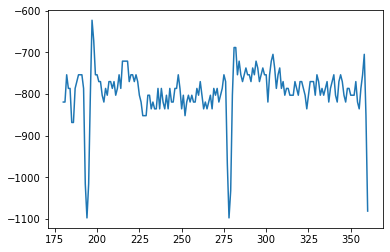

In [72]:
x, y = show_window_data_a.new_data_available(df)
sns.lineplot(x=x, y=y)

In [25]:
import plotly.express as px

fig = px.line(x=x, y=y, title='Test')
fig.show()

In [74]:
df

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
3203,-884.736
3204,-933.888
3205,-901.120
3206,-917.504


In [83]:
class data_simulation:

    def __init__(self):
        self.df = df
        self.df_ini = 

In [84]:
data_sim = data_simulation()

In [85]:
data_sim.df

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
3203,-884.736
3204,-933.888
3205,-901.120
3206,-917.504


In [22]:
window = 180

class data_simulation:

    def __init__(self):
        self.df_data = df_ecg
        self.starting_frame = 0
        self.ending_frame = window
        self.iteration = 0
        self.df_data_simu = self.df_data.loc[self.starting_frame:self.ending_frame + self.iteration ]

    def __call__(self):
        self.iteration += 1
        self.df_data_simu = self.df_data.loc[self.starting_frame:self.ending_frame + self.iteration ]

In [23]:
df_ecg = df

In [28]:
data_simu = data_simulation()
data_simu.iteration

0

In [33]:
data_simu()
data_simu.iteration

3

In [95]:
data_simu.update()
data_simu.df_data_simu

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
178,-819.200
179,-802.816
180,-819.200
181,-819.200
